## Simulating fault-tolerant error-correction circuits

Here we step through the process of constructing and simulating quantum error-correction using the heavy-hexagon compass code family.

You can find more information in the following references, but the results we illustrate in this notebook are not identical to those in the references.

References:

* https://journals.aps.org/prx/abstract/10.1103/PhysRevX.10.011022 (Chamberland, Zhu, Yoder, Hertzberg, AWC)
* https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.128.110504 (Chen, Yoder, Kim, Sundaresan, Srinivasan, Li, Córcoles, AWC, Takita)
* https://arxiv.org/abs/2203.07205 (Sundaresan, Yoder, Kim, Li, Chen, Harper, Thorbeck, AWC, Córcoles, Takita)

### Heavy-hexagon compass code family

This is the gauge group of the code family:
<img src="img/gauge-group.png" alt="gauge group" width="400"/>
The qubits are placed on a square lattice and the gauge operators act on neighboring squares or loops. Here is a distance 3 example.

Layout             |  Stabilizers
:-------------------------:|:-------------------------:
<img src="img/d3-sketch.png" alt="d=3 gauge" width="300"/>  |  <img src="img/d3-stabilizers.png" alt="d=3 stabilizers" width="400"/>

Given the definition of the code family, we can implement a method to generate instances of the code with a given distance.

In [1]:
from qiskit_qec.codes.hhc import HHC

code3 = HHC(3)
print(code3)
print(code3.x_gauges)

[[9, 1, 3]] heavy-hexagon compass code
[[0, 3], [1, 4], [2, 5], [3, 6], [4, 7], [5, 8]]


In [2]:
code5 = HHC(5)
print(code5)
print(code5.z_stabilizers)

[[25, 1, 5]] heavy-hexagon compass code
[[0, 1, 5, 6, 10, 11, 15, 16, 20, 21], [1, 2, 6, 7, 11, 12, 16, 17, 21, 22], [2, 3, 7, 8, 12, 13, 17, 18, 22, 23], [3, 4, 8, 9, 13, 14, 18, 19, 23, 24]]


### Corresponding error-correction circuits

We follow the gate schedule described in Chamberland, Zhu, Yoder, Hertzberg, AWC, "Topological and subsystem codes on low-degree graphs with flag qubits", PRX 10, 011022 (2020). Note that the X and Z stabilizers are flipped in our implementation relative to the definition in this paper:

<img src="img/gate-schedule.png" alt="gate schedule" width="400"/>

We have encapsulated several different variations of fault-tolerant syndrome measurement circuits into a circuit generation object. Here is an example with comments to explain the parameters.

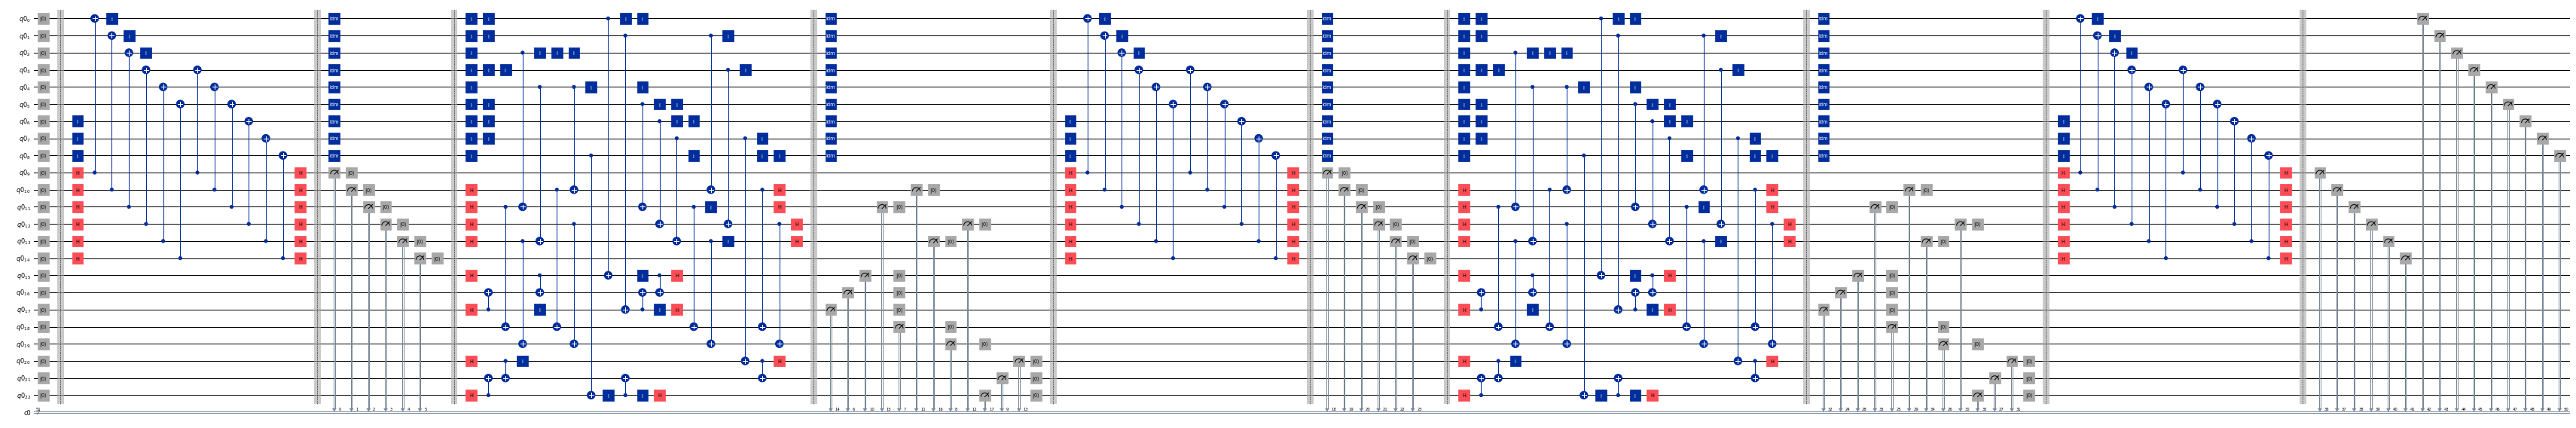

In [4]:
from qiskit_qec.circuits.hhc_circuit import HHCCircuit


gen = HHCCircuit(
    code3,  # code data
    barriers=False,  # insert barrier ops to align layers
    idles=True,  # insert idle ops during cnot gate layers
    distinct_measurement_idle=True,  # insert measure idle ops
    init_error=True,  # insert initialization ops
    group_meas=True,  # align syndrome measurements into layers
    xprs=False,  # use alternative reset instruction
    blocks=1,  # number of repetitions of round_schedule
    round_schedule='xzxzx',  # gauge operator measurement schedule
    basis='z',  # measure/prep. basis
    initial_state='+',  # prep. eigenvalue
    logical_paulis='iiiii',  # interleave logical Pauli operators
    num_initialize=1,  # number of times to repeat initialization
    idle_before_measure=False  # insert unique idle ops before measurements
    )
circ = gen.syndrome_measurement(1, 'xzxzx', 'z', '+')
circ.draw(output='mpl', style='iqx', scale=0.5, fold=1000)

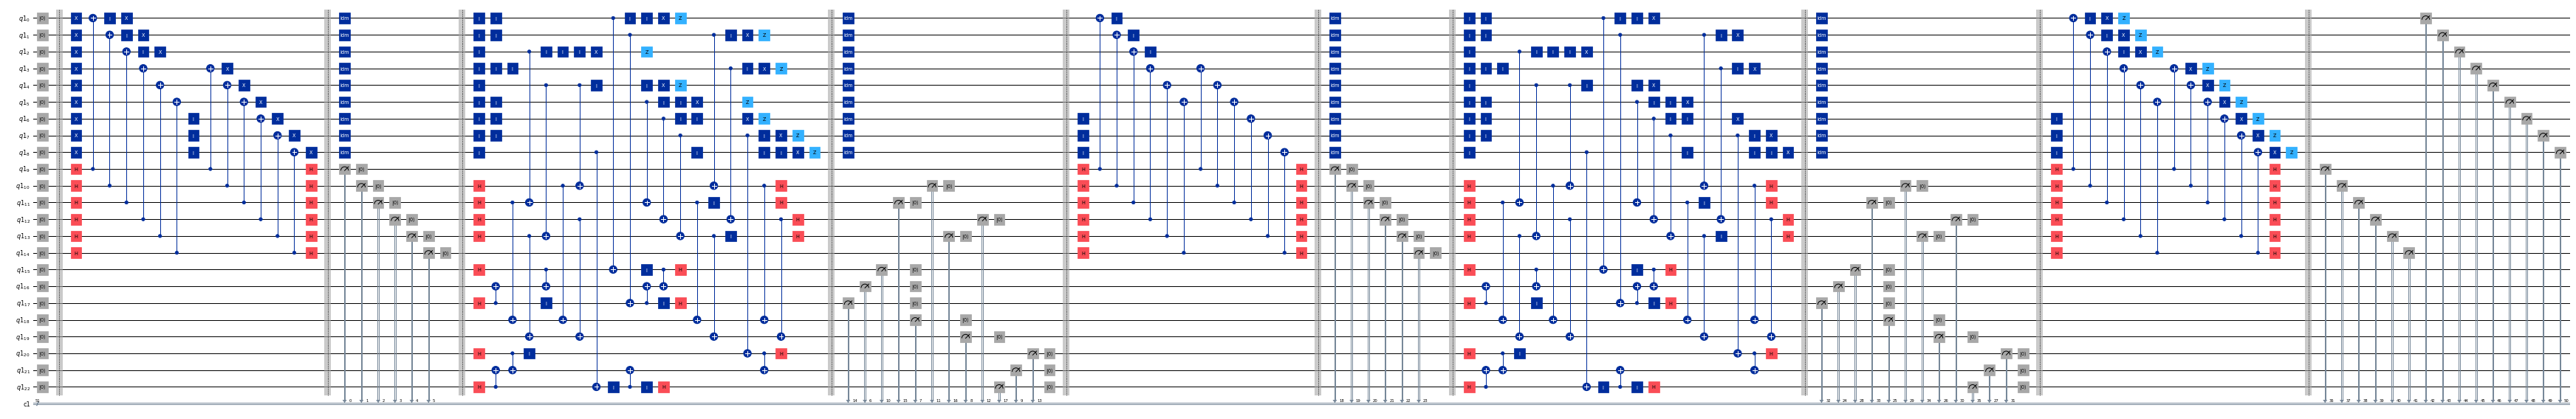

In [4]:
gen = HHCCircuit(
    code3,
    barriers=False,
    idles=True,
    distinct_measurement_idle=True,
    init_error=True,
    group_meas=True,
    xprs=False,
    blocks=1,
    round_schedule='xzxzx',
    basis='z', 
    initial_state='-',  # changed to -1 eigenstate
    logical_paulis='xyixy',  # put in some logical Pauli operators
    num_initialize=1,
    idle_before_measure=False
    )
circ = gen.syndrome_measurement(1, 'xzxzx', 'z', '-')
circ.draw(output='mpl', style='iqx', scale=0.5, fold=1000)

Here we construct a circuit with 3 total X syndrome measurements in the X basis that we will use later.

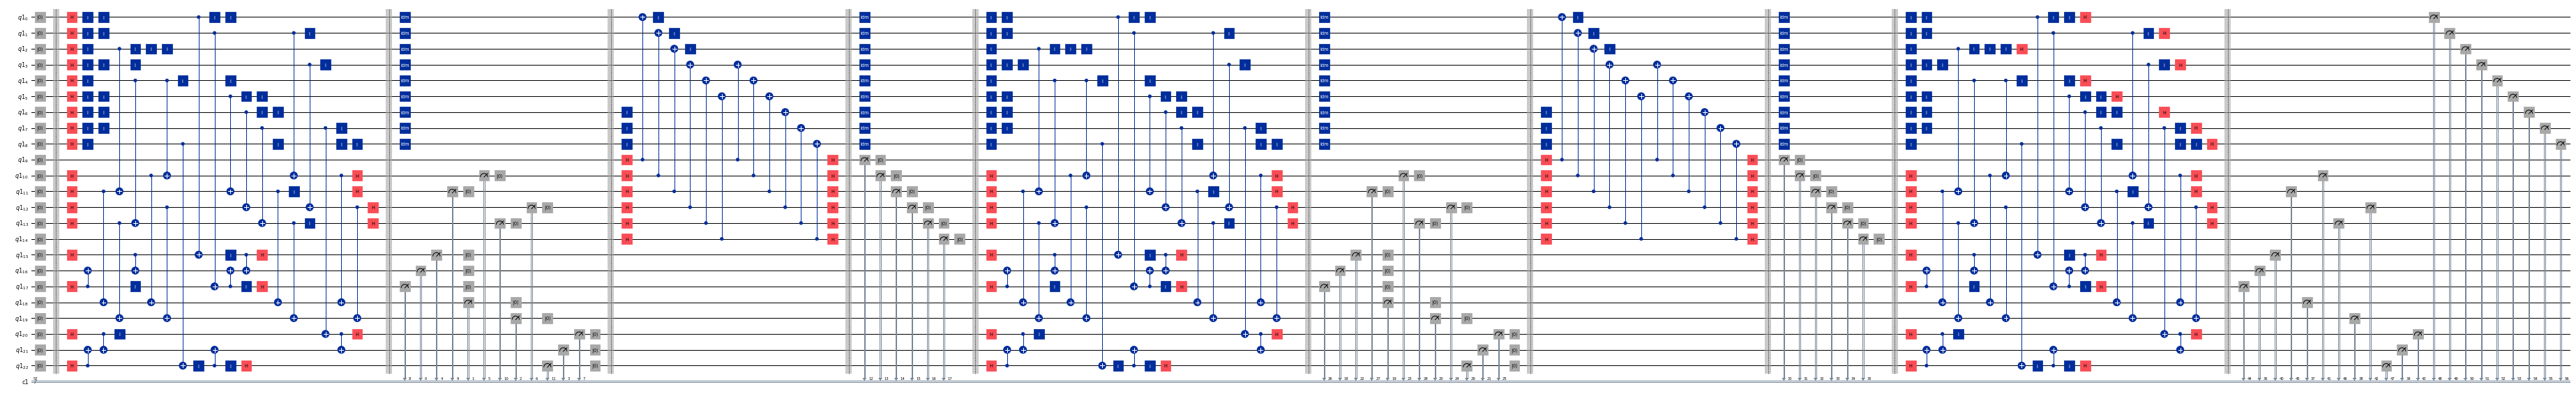

In [5]:
gen3 = HHCCircuit(
    code3,
    barriers=False,
    idles=True,
    distinct_measurement_idle=True,
    init_error=True,
    group_meas=True,
    xprs=False,
    blocks=1,
    round_schedule='zxzxz',  # changed to other measurement order
    basis='x',  # changed to X basis
    initial_state='+',
    logical_paulis='iiiii',
    num_initialize=1,
    idle_before_measure=False
    )
circ3 = gen3.syndrome_measurement(1, 'zxzxz', 'x', '+')
circ3.draw(output='mpl', style='iqx', scale=0.5, fold=1000)

In [6]:
print(circ3.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q2[23];
creg c2[57];
reset q2[0];
reset q2[1];
reset q2[2];
reset q2[3];
reset q2[4];
reset q2[5];
reset q2[6];
reset q2[7];
reset q2[8];
reset q2[9];
reset q2[10];
reset q2[11];
reset q2[12];
reset q2[13];
reset q2[14];
reset q2[15];
reset q2[16];
reset q2[17];
reset q2[18];
reset q2[19];
reset q2[20];
reset q2[21];
reset q2[22];
barrier q2[0],q2[1],q2[2],q2[3],q2[4],q2[5],q2[6],q2[7],q2[8],q2[9],q2[10],q2[11],q2[12],q2[13],q2[14],q2[15],q2[16],q2[17],q2[18],q2[19],q2[20],q2[21],q2[22];
h q2[0];
h q2[1];
h q2[2];
h q2[3];
h q2[4];
h q2[5];
h q2[6];
h q2[7];
h q2[8];
h q2[17];
h q2[11];
h q2[13];
h q2[22];
cx q2[17],q2[16];
h q2[15];
cx q2[11],q2[18];
h q2[10];
cx q2[13],q2[19];
h q2[12];
cx q2[22],q2[21];
h q2[20];
id q2[0];
id q2[1];
id q2[2];
id q2[3];
id q2[4];
id q2[5];
id q2[6];
id q2[7];
id q2[8];
cx q2[15],q2[16];
id q2[17];
cx q2[10],q2[18];
cx q2[2],q2[11];
cx q2[12],q2[19];
cx q2[4],q2[13];
cx q2[20],q2[21];
cx q2[8],q2[22];
id q2[0];

Let's construct higher distance examples to carry forward.

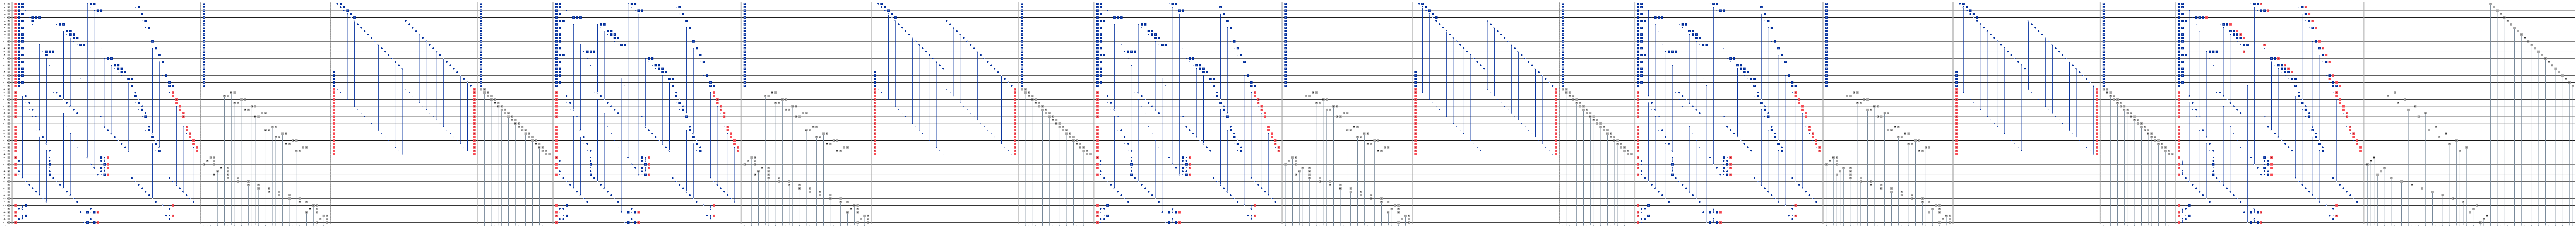

In [7]:
code5 = HHC(5)
gen5 = HHCCircuit(
    code5,  # distance 5 code
    barriers=False,
    idles=True,
    distinct_measurement_idle=True,
    init_error=True,
    group_meas=True,
    xprs=False,
    blocks=1,
    round_schedule='zxzxzxzxz',  # longer measurement schedule, 5 X rounds
    basis='x',
    initial_state='+',
    logical_paulis='iiiiiiiii', 
    num_initialize=1,
    idle_before_measure=False
    )
circ5 = gen5.syndrome_measurement(1, 'zxzxzxzxz', 'x', '+')
circ5.draw(output='mpl', style='iqx', scale=0.5, fold=1000)

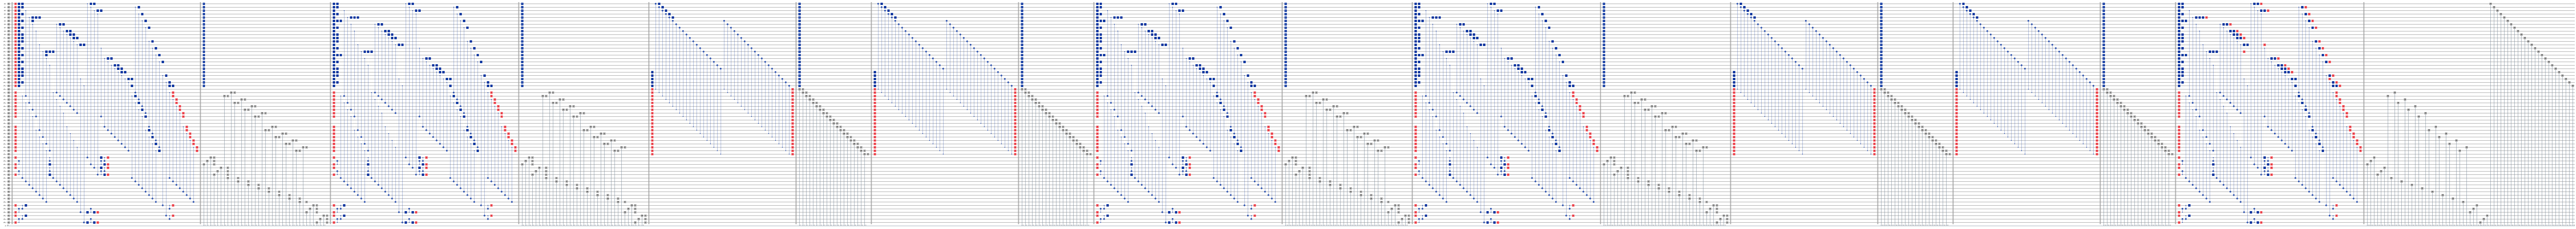

In [8]:
gen5_2 = HHCCircuit(
    code5,
    barriers=False,
    idles=True,
    distinct_measurement_idle=True,
    init_error=True,
    group_meas=True,
    xprs=False,
    blocks=1,
    round_schedule='zzxxzzxxz',  # different measurement order
    basis='x',
    initial_state='+',
    logical_paulis='iiiiiiiii',
    num_initialize=1,
    idle_before_measure=False
    )
circ5_2 = gen5_2.syndrome_measurement(1, 'zzxxzzxxz', 'x', '+')
circ5_2.draw(output='mpl', style='iqx', scale=0.5, fold=1000)

### Pauli noise model

We define a circuit-level depolarizing noise model.

In [9]:
from qiskit_qec.noise.paulinoisemodel import PauliNoiseModel

model = PauliNoiseModel()
model.add_operation("cx", {"ix": 1, "iy": 1, "iz": 1,
                        "xi": 1, "xx": 1, "xy": 1, "xz": 1,
                        "yi": 1, "yx": 1, "yy": 1, "yz": 1,
                        "zi": 1, "zx": 1, "zy": 1,
                        "zz": 1})
model.add_operation("id", {"x": 1, "y": 1, "z": 1})
model.add_operation("reset", {"x": 1})
model.add_operation("measure", {"x": 1})
model.add_operation("h", {"x": 1, "y": 1, "z": 1})
model.add_operation("s", {"x": 1, "y": 1, "z": 1})
model.add_operation("x", {"x": 1, "y": 1, "z": 1})
model.add_operation("y", {"x": 1, "y": 1, "z": 1})
model.add_operation("z", {"x": 1, "y": 1, "z": 1})
model.add_operation("idm", {"x": 1, "y": 1, "z": 1})
model.add_operation("idinit", {"x": 1, "y": 1, "z": 1})

In [10]:
op_names = ["cx", "id", "reset", "measure",
            "h", "s", "x", "y", "z", "idm", "idinit"]
for name in op_names:
    model.set_scale_factor(name, 1)
model.set_scaled_error_probabilities(0.001)

The Aer simulator in Qiskit allows you to define more general noise models. I won't go into it here, but you can see how to use it by looking at the API documentation for the module (qiskit.providers.aer.noise).

https://qiskit.org/documentation/apidoc/aer_noise.html

Aer will simulate more general noise models using a different engine, such as the state vector simulator, that might not scale to large error-correction simulations. However, it will give you accurate results for these more realistic models.

We can convert the Pauli noise object into an Aer noise model for running simulations.

In [11]:
model.as_aer_noise_model()

<NoiseModel on ['z', 'measure', 'y', 'id', 'h', 'reset', 'idinit', 'idm', 'x', 's', 'cx']>

In [12]:
print(model.as_aer_noise_model())

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 's', 'sx', 'x', 'y', 'z']
  Instructions with noise: ['z', 'measure', 'y', 'id', 'h', 'reset', 'idinit', 'idm', 'x', 's', 'cx']
  All-qubits errors: ['cx', 'id', 'reset', 'h', 's', 'x', 'y', 'z', 'idm', 'idinit', 'measure']


If you wanted to build an Aer noise model directly, this is what it looks like. Notice that you can give any transition matrix for the readout noise this way.

In [13]:
from qiskit.providers.aer import noise
# from qiskit.providers.aer.noise import NoiseModel
# from qiskit.providers.aer.noise.errors import *

p1 = 0.0001
q = 0.01
p2 = 0.006
aer_model = noise.noise_model.NoiseModel()
perror1 = noise.errors.pauli_error([('I', 1.0-p1), ('X', p1/3.0), ('Y', p1/3.0), ('Z', p1/3.0)])
perrorx = noise.errors.pauli_error([('I', 1.0-q), ('X', q)])
perror2 = noise.errors.pauli_error([('II', 1.0-p2), ('IX', p2/15.0),
                                    ('IY', p2/15.0), ('IZ', p2/15.0),
                                    ('XI', p2/15.0), ('XX', p2/15.0),
                                    ('XY', p2/15.0), ('XZ', p2/15.0),
                                    ('YI', p2/15.0), ('YX', p2/15.0),
                                    ('YY', p2/15.0), ('YZ', p2/15.0),
                                    ('ZI', p2/15.0), ('ZX', p2/15.0),
                                    ('ZY', p2/15.0), ('ZZ', p2/15.0)])
rerror = noise.errors.readout_error.ReadoutError([[1.0-q, q], [q, 1.0-q]])
aer_model.add_all_qubit_quantum_error(perror1, ['h', 'id'])
aer_model.add_all_qubit_quantum_error(perror2, ['cx'])
aer_model.add_all_qubit_quantum_error(perrorx, ['reset'])
aer_model.add_all_qubit_readout_error(rerror)
print(aer_model)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['measure', 'id', 'h', 'reset', 'cx']
  All-qubits errors: ['h', 'id', 'cx', 'reset', 'measure']


### Matching decoder

Our next step is to construct MWPM (minimum weight perfect matching) decoders paired with each of the example circuits above.

<img src="img/schedule-induced-gauge-fixing.png" alt="schedule-induced gauge fixing" width="900"/>

We build the decoding graph in two stages. The first stage constructs a graph based on how the stabilizer/gauge supports overlap, without looking at the quantum circuit. The second stage propagates faults through the circuit to determine edge weights and presence/absence of any edges. Here is some more information about this process:

<img src="img/initial-graph.png" alt="initial graph construction" width="900"/>
<img src="img/revise-graph.png" alt="graph revision" width="900"/>

This first example I will use the distance 5 code with schedule-induced gauge fixing to illustrate the structure of the decoding graph.

In [11]:
from qiskit_qec.decoders.hhc_decoder import HHCDecoder

dec = HHCDecoder(
    n=code5.n,  # code block size
    css_x_gauge_ops=code5.x_gauges,  # X gauge ops
    css_x_stabilizer_ops=code5.x_stabilizers,  # X stabilizers
    css_x_boundary=code5.x_boundary,  # X boundary (logical Z ends)
    css_z_gauge_ops=code5.z_gauges,  # Z gauge ops
    css_z_stabilizer_ops=code5.z_stabilizers,  # Z stabilizers
    css_z_boundary=code5.z_boundary,  # Z boundary (logical X ends)
    circuit=circ5_2,  # quantum circuit
    model=model,  # pauli noise model
    basis='x',  # default measure/prepare basis
    round_schedule='zzxxzzxxz',  # schedule of syndrome measurements
    blocks=1,  # number of times to repeat the schedule
    method='retworkx',  # MWPM implementation
    uniform=False,  # set all edge weights equal
    decoding_graph=None,  # input decoding graph
    annotate=True  # populate decoding graph data each run
)

First, I want to point out a method to directly draw a retworkx graph. It has a lot of options I did not explore, so it seems likely that you can pass in layout information to make the drawing look nicer.

In [13]:
import retworkx
from retworkx.visualization import mpl_draw

def draw_graph(graph : retworkx.PyGraph):
    """Draw retworkx decoding graph."""
    ecolors = ['k'] * graph.num_edges()
    for i, edge in enumerate(graph.edge_list()):
        dat = graph.get_all_edge_data(edge[0], edge[1])
        if dat[0]['highlighted']:
            ecolors[i] = 'r'
    vcolors = ['b'] * graph.num_nodes()
    for node in graph.node_indexes():
        dat = graph.get_node_data(node)
        if dat['time'] % 2 == 1:
            vcolors[node] = 'g'
        if 'is_boundary' in dat:
            vcolors[node] = 'm'
        if dat['highlighted']:
            vcolors[node] = 'r'
    mpl_draw(graph, edge_list=graph.edge_list(),
             edge_color=ecolors, node_list=graph.node_indexes(),
             node_color=vcolors)

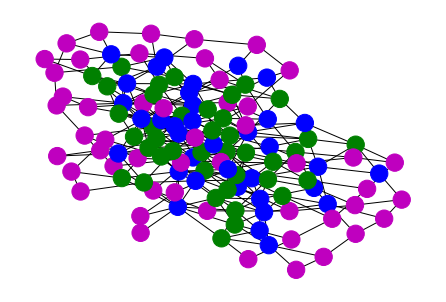

In [16]:
draw_graph(dec.graph)

Instead of implementing a layout above, I am going to use pyviz to produce an interactive picture of the decoding graph.

In [14]:
from qiskit_qec.decoders.temp_graph_util import ret2net

def make_pyviz_input_graph(decoding_graph: retworkx.PyGraph):
    """Format decoding graph for display by pyviz.

    decoding_graph = input graph
    Return networkx graph for display.
    """
    graph = ret2net(decoding_graph)
    # Make edge attributes serializable and add color and title
    for _, _, a in graph.edges(data=True):
        if "weight_poly" in a:
            a["weight_poly"] = str(a["weight_poly"])
            a["title"] = a["weight_poly"] + ", qubit=" + str(a["qubits"])
        else:
            a["title"] = str(a["weight"]) + ", qubit=" + str(a["qubits"])
        if a["measurement_error"] == 1:
            a["color"] = "green"
        else:
            a["color"] = "black"
        if a["highlighted"] == 1:
            a["color"] = "red"
    # Add size, title, and color node attributes
    for _, a in graph.nodes(data=True):
        if "is_boundary" in a and a["is_boundary"]:
            a["size"] = 30
        else:
            a["size"] = 50
        a["title"] = str(a["qubits"])  # visible on mouseover
        colors = ["green", "blue"]
        a["color"] = colors[a["time"] % len(colors)]
        if "highlighted" in a and a["highlighted"]:
            a["color"] = "red"
    return graph

In [20]:
from IPython.core.display import display, HTML
from IPython.display import IFrame
from pyvis import network as net

g = net.Network(height="500px", width='100%',
                heading='', notebook=True)
g.barnes_hut()
graph = make_pyviz_input_graph(dec.graph)
g.from_nx(graph)
g.show("display.html")
IFrame(src='./display.html', width=900, height=550)

The nodes and edges of the graph are decorated with additional data. Here is a brief description:
<img src="img/vertex-edge-data-1.png" alt="annotations" width="800"/>
<img src="img/vertex-edge-data-2.png" alt="annotations" width="800"/>

In [19]:
dec.graph.get_node_data(1)

{'time': 0, 'qubits': [2, 3, 7, 8], 'highlighted': False}

In [20]:
dec.graph.get_edge_data(1, 4)

{'qubits': [7],
 'measurement_error': 0,
 'weight': 1,
 'highlighted': False,
 'weight_poly': Poly(3.33333333333333*h + 4.53333333333333*cx + 5.33333333333333*id + 1.33333333333333*idm + 4.0*measure + 1.0*reset, h, cx, id, idm, measure, reset, domain='RR')}

The symbolic edge weight expressions are computed by propagating faults through the circuit. Here is an overview of how they are computed. This description assumes that we have reparameterized our Pauli channels so that they factor into a product of channels that each apply a single Pauli term. However, it is not always possible to find such a factorization, so here we simply take the channels as given and accept that we are making a small error in the edge flip probability approximations.

<img src="img/edge-weights-1.png" alt="weights 1" width="800"/>
<img src="img/edge-weights-2.png" alt="weights 2" width="800"/>

Let's run a single shot of the circuit now and plot the highlighted vertices and edges.

In [16]:
from qiskit import execute, Aer

def simulate_circuit(qc, shots, model=None, seed=100):
    """Simulate a circuit with the stabilizer simulator.
    
    qc = QuantumCircuit to simulate
    shots = number of shots to run
    model = noise model to use, None if no noise
    seed = seed value for random number generator
    
    Return the dictionary of counts.
    """
    qasmsim = Aer.get_backend('aer_simulator')
    if model is None:
        result = execute(qc, qasmsim, method="stabilizer", shots=shots,
                         optimization_level=0, seed_simulator=seed).result()
    else:
        result = execute(qc, qasmsim, 
                         noise_model=model.as_aer_noise_model(),
                         basis_gates=model.as_aer_noise_model().basis_gates,
                         method="stabilizer",
                         shots=shots,
                         optimization_level=0,
                         seed_simulator=seed).result()
    return result.get_counts(qc)


In [17]:
counts = simulate_circuit(qc=circ5_2, shots=1, model=model, seed=99)
counts

{'110111000110100010100011000000000000000000000000001100010001000010010010011001100000101000100110011000000000000000000000000001100001000100000000000000000000000001100001000100001000010001100000000010000100011000000000000000000000000000000001001001111000000000000000000000000001001001111': 1}

In [18]:
dec.update_edge_weights(model)
for outcome, num in counts.items():
    outcomes = list(map(int, outcome[::-1]))
    corrected_outcomes = dec.process(outcomes=outcomes)
    print(corrected_outcomes)

[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]


In [19]:
g = net.Network(height="500px", width='100%',
                heading='', notebook=True)
g.barnes_hut()
graph = make_pyviz_input_graph(dec.matcher.annotated_graph)
g.from_nx(graph)
g.show("display.html")
IFrame(src='./display.html', width=900, height=550)

## Simulations

#### Test that all single-faults corrected

In [25]:
dec_pm_3 = HHCDecoder(code3.n,
    code3.x_gauges, code3.x_stabilizers, code3.x_boundary,
    code3.z_gauges, code3.z_stabilizers, code3.z_boundary,
    circ3, model, 'x', 'zxzxz', 1, 'pymatching', False)

In [26]:
from qiskit_qec.analysis.faultenumerator import FaultEnumerator

fe = FaultEnumerator(circ3, 1, "propagator", model=model, sim_seed=0)
result = list(fe.generate_blocks())[0]

In [34]:
from qiskit_qec.decoders.temp_code_util import temp_syndrome

failures = 0
dec_pm_3.update_edge_weights(model)
for record in result:
    outcomes = record[3]
    corrected_outcomes = dec_pm_3.process(outcomes=outcomes)
    fail = temp_syndrome(corrected_outcomes, code3.logical_z)
    failures += fail[0]
print(failures)

0


#### Simulate circuit with Pauli noise

In [41]:
import numpy as np

def sigma(p, shots):
    """Compute the sample standard deviation.
    
    p = Bernoulli parameter
    shots = number of samples
    
    Return the value.
    """
    return np.sqrt(p * (1-p)/float(shots-1))

In [57]:
import time

def sim(circ, shots, p, decoder, code, model, basis, initial_state):
    """Simulate one circuit."""
    tic = time.perf_counter()
    model.set_scaled_error_probabilities(p)
    counts_n = simulate_circuit(circ, shots, model)
    toc = time.perf_counter()
    print(f"simulate circuits in {toc - tic:0.4f} seconds")
    decoder.update_edge_weights(model)
    tic = time.perf_counter()
    failures = 0
    for (outcome, num) in counts_n.items():
        reversed_outcome = list(map(int, outcome[::-1]))  # convert to list of integers
        corrected_outcomes = decoder.process(reversed_outcome)
        if basis == 'z':
            fail = temp_syndrome(corrected_outcomes, code.logical_x)
        elif basis == 'x':
            fail = temp_syndrome(corrected_outcomes, code.logical_z)
        if initial_state == '-':
            fail[0] = (fail[0] + 1) % 2
        if bool(fail[0]):
            failures += num
    toc = time.perf_counter()
    print(f"decode outcomes in {toc - tic:0.4f} seconds")
    pfail = float(failures)/float(shots)
    sig = sigma(pfail, shots)
    return pfail, sig

In [58]:
sim(circ3, 10000, 0.001, dec_pm_3, code3, model, 'x', '+')

simulate circuits in 6.8641 seconds
decode outcomes in 1.3859 seconds


(0.0069, 0.0008278330331371631)

#### Simulate circuit at multiple error probabilities

In [59]:
def scan_hhc(shots, pin, model, d, blocks, round_schedule, basis, initial_state):
    pfails = []
    sigs = []
    print('scanning %d %d %s %s %s' % (d, blocks, round_schedule, basis, initial_state))
    code = HHC(d)
    gen = HHCCircuit(code, barriers=True, idles=True, distinct_measurement_idle=False,
                     init_error=True, group_meas=False, xprs=False, blocks=blocks,
                     round_schedule=round_schedule, basis=basis, initial_state=initial_state,
                     logical_paulis='i'*len(round_schedule), num_initialize=1, idle_before_measure=False)
    circ = gen.syndrome_measurement(blocks, round_schedule, basis, initial_state)
    tic = time.perf_counter()
    decoder = HHCDecoder(code.n, code.x_gauges, code.x_stabilizers, code.x_boundary,
                         code.z_gauges, code.z_stabilizers, code.z_boundary, circ, model, basis,
                         round_schedule, blocks, 'pymatching', False)
    toc = time.perf_counter()
    print(f"construct decoder in {toc - tic:0.4f} seconds")
    for p in pin:
        print('running %d %f' % (shots, p))
        pf, s = sim(circ, shots, p, decoder, code, model, basis, initial_state)
        pfails.append(pf)
        sigs.append(s)
    return pfails, sigs

In [60]:
pin = [0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
pfails, sigs = scan_hhc(10000, pin, model, 3, 1, 'xzxzx', 'z', '+')
pfailsx, sigsx = scan_hhc(10000, pin, model, 3, 1, 'zxzxz', 'x', '+')
print(pfails)
print(sigs)
print(pfailsx)
print(sigsx)

scanning 3 1 xzxzx z +
construct decoder in 0.2056 seconds
running 10000 0.000400
simulate circuits in 5.5399 seconds
decode outcomes in 1.2071 seconds
running 10000 0.000500
simulate circuits in 5.3380 seconds
decode outcomes in 1.2455 seconds
running 10000 0.000600
simulate circuits in 5.5735 seconds
decode outcomes in 1.3112 seconds
running 10000 0.000700
simulate circuits in 5.9206 seconds
decode outcomes in 1.2880 seconds
running 10000 0.000800
simulate circuits in 5.8569 seconds
decode outcomes in 1.2997 seconds
running 10000 0.000900
simulate circuits in 5.9554 seconds
decode outcomes in 1.3084 seconds
scanning 3 1 zxzxz x +
construct decoder in 0.2844 seconds
running 10000 0.000400
simulate circuits in 7.2260 seconds
decode outcomes in 1.3290 seconds
running 10000 0.000500
simulate circuits in 7.3925 seconds
decode outcomes in 1.3159 seconds
running 10000 0.000600
simulate circuits in 8.4541 seconds
decode outcomes in 1.5289 seconds
running 10000 0.000700
simulate circuits in 8

*Note*: There is an error propagation simulator in qiskit-qec called FaultSampler.

Since we spend most of our time in the stabilizer simulator, using the sampler may speed things up (once we are convinced the circuit is correct from stabilizer simulation).

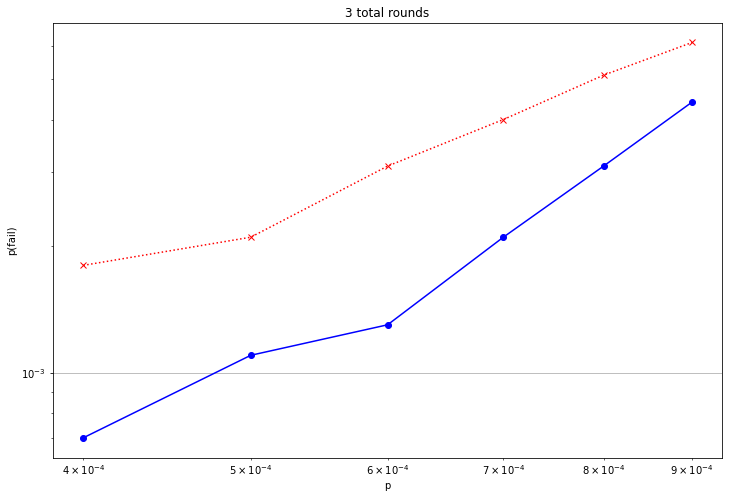

In [61]:
import matplotlib.pyplot as plt

pin = [0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
pfails = [0.0007, 0.0011, 0.0013, 0.0021, 0.0031, 0.0044]
pfailsx=[0.0018, 0.0021, 0.0031, 0.004, 0.0051, 0.0061]
plt.figure(figsize=(12,8))
plt.loglog(pin, pfails, 'bo-')  # Z basis
plt.loglog(pin, pfailsx, 'rx:')  # X basis (larger errors here, consistent with other results)
plt.grid(which='major',axis='both')
plt.title('3 total rounds')
plt.xlabel('p')
plt.ylabel('p(fail)')
plt.show()

### Results for a family of circuits

*Caveat*: these plots were produced with different software, but we expect the results can be reproduced using qiskit-qec.

<img src="img/sim-results.png" alt="results" width="900"/>